<a href="https://colab.research.google.com/github/SDS-AAU/SDS-master/blob/master/M1/notebooks/data_exploration_workshop_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import HTML

# Explorative analysis and data visualization
### Roman Jurowetzki 

In this session we will explore a **real** dataset from the Stanford Open Policing Project. 
The project is collecting and standardizing data on vehicle and pedestrian stops from law enforcement departments across the US — and making that information freely available. They have already gathered 130 million records from 31 state police agencies and have begun collecting data on stops from law enforcement agencies in major cities, as well.

You can read more about the project [here](https://openpolicing.stanford.edu)

![open police](https://comm.stanford.edu/mm/2017/08/open-policing-project.jpg)


#### Exploratory data analysis

You can read more about EDA with pandas [here](https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python)

## Agenda

- Import and examine the data for one US state
- Preprocess the data (cleaning, adjusting datatypes)
- Calculate some simple statistics on different levels of aggregation

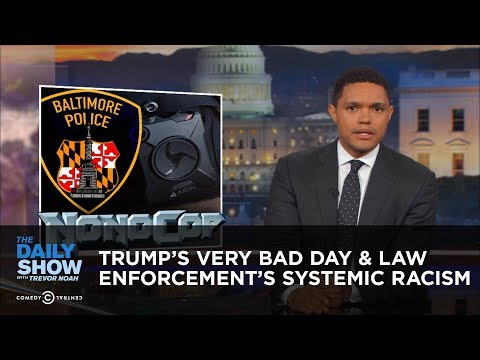

In [ ]:
#@title ## Some Youtube Context

from IPython.display import YouTubeVideo
YouTubeVideo('PelSGxTPlXM',start=435, frameborder="0", width=800, height=500)

## Let's get started

First we'll download the latest dataset directly from the Stanford server. To do that we use Jupyter's **!** command line magic. Passing a `!` in a code cell, will send the command to shell rather than Python or R. `!wget` will open the GNU Wget Unix/Linux program that downloads content from web servers.

In [2]:
# Download the semi-raw data

!wget https://sds-aau.github.io/SDS-master/M1/data/RI-clean.csv.gz

--2020-09-08 12:02:17--  https://sds-aau.github.io/SDS-master/M1/data/RI-clean.csv.gz
Resolving sds-aau.github.io (sds-aau.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to sds-aau.github.io (sds-aau.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6026983 (5.7M) [application/gzip]
Saving to: ‘RI-clean.csv.gz’

RI-clean.csv.gz     100%[===================>]   5.75M  19.3MB/s    in 0.3s    

2020-09-08 12:02:18 (19.3 MB/s) - ‘RI-clean.csv.gz’ saved [6026983/6026983]



In [3]:
# Unzip the file to get a csv
!gunzip RI-clean.csv.gz

In [4]:
!ls -lh

total 75M
-rw-r--r-- 1 root root  75M Sep  8 09:57 RI-clean.csv
drwxr-xr-x 1 root root 4.0K Aug 27 16:39 sample_data


Let's import pandas as pd. The appbriviation pd is a convention. We also load the data using pandas's `read_csv` command. Pandas will try to infer the appropriate datatypes for all columns. We set the `low_memory` argument to `False`, which is often done in cases with possible mixed datatypes. By the way: You if you place the cursor after the '(' after a command and use string+tab, you can read the docummentation for the particular command or function.

In [5]:
import pandas as pd

In [6]:
data = pd.read_csv('RI-clean.csv', low_memory=False)

We can examine the dataset in several ways, for instance, by checking the first couple of rows or by printing the "info".

In [7]:
#Display the first 5 (or more/less rows) of each column
data.head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,NaN,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,NaN,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2,RI-2005-00003,RI,2005-01-04,11:30,Zone X1,NaN,NaN,NaN,000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X1
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,NaN,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,NaN,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


- Each row is one traffic stop
- NaN are missing values

In [8]:
#Display overview information for the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509681 entries, 0 to 509680
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     509681 non-null  object 
 1   state                  509681 non-null  object 
 2   stop_date              509671 non-null  object 
 3   stop_time              509671 non-null  object 
 4   location_raw           509681 non-null  object 
 5   county_name            0 non-null       float64
 6   county_fips            0 non-null       float64
 7   fine_grained_location  0 non-null       float64
 8   police_department      509671 non-null  object 
 9   driver_gender          480584 non-null  object 
 10  driver_age_raw         480632 non-null  float64
 11  driver_age             478986 non-null  float64
 12  driver_race_raw        480608 non-null  object 
 13  driver_race            480608 non-null  object 
 14  violation_raw          480608 non-nu

In [9]:
# print the shape of the DF as an easy alternative to looking up this in info.
data.shape

(509681, 26)

### Missing values

In [10]:
# Show missing values (mask), cut to the first 10 rows. Note, that python index alsways starts with 0!
data.isnull()[:10]

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,True,True,True,False,True,True,True,True,True,True,True,False,True,True,False,True,True,True,True,False,False
3,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
5,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
6,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
7,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
8,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
9,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


We can see that the county_name column is all missing. And thus we can drop it. Also, we probably should drop all cases, where we don't know the time and date of the stop, the gender of the driver

```inplace``` is a useful parameter that allows us to drop things without having to define a new object. This is of cause not something that we have to do but smart. It is also a good example for how there are alsways several ways of doing things...

In [12]:
# We drop the county_name columns.

data.drop('county_name', axis='columns', inplace=True)

In [ ]:
# Which other columns are probably not interesting? Can you drop several columns at once?

data.drop(xxxxx, axis='columns', inplace=True)

In [13]:
# Drop all columns where stop_data, time, and driver_gender are missing
data.dropna(subset=['stop_date', 'stop_time', 'driver_gender'], inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480584 entries, 0 to 509670
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     480584 non-null  object 
 1   state                  480584 non-null  object 
 2   stop_date              480584 non-null  object 
 3   stop_time              480584 non-null  object 
 4   location_raw           480584 non-null  object 
 5   county_fips            0 non-null       float64
 6   fine_grained_location  0 non-null       float64
 7   police_department      480584 non-null  object 
 8   driver_gender          480584 non-null  object 
 9   driver_age_raw         480583 non-null  float64
 10  driver_age             478946 non-null  float64
 11  driver_race_raw        480584 non-null  object 
 12  driver_race            480584 non-null  object 
 13  violation_raw          480584 non-null  object 
 14  violation              480584 non-nu

In [15]:
data.head()

,id,state,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,RI-2005-00001,RI,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,RI-2005-00002,RI,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
3,RI-2005-00004,RI,2005-01-04,12:55,Zone X4,NaN,NaN,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
4,RI-2005-00005,RI,2005-01-06,01:30,Zone X4,NaN,NaN,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
5,RI-2005-00006,RI,2005-01-12,08:05,Zone X1,NaN,NaN,000,M,1973.0,32.0,B,Black,Call for Service,Other,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


### Adjusting data types

In [16]:
# let's check this potential candidate column
data.is_arrested.head()

0    False
1    False
3    False
4    False
5    False
Name: is_arrested, dtype: object

This column should be boolian but for some reason ended up being a string (or object). This is not efficient and limits our options in terms of what we can do with it. Therefore, we will change the datatype.

#### On bracket vs. dot notation:

In Python you will find 2 notation types. [ ] and .

```
ri['is_arrested'] is the same as ri.is_arrested
```


However, if you assign something and have it on the left side of = you should always use [ ] notation



In [17]:
# Assign the is_arrested column a new datatype
data['is_arrested'] = data.is_arrested.astype('bool')

In [18]:
data.is_arrested.dtype

dtype('bool')

** Is there another instance of wrong data type?  Let's fix that!**

In [ ]:
# ADD SOME CODE HERE

### Adjusting dates, times and index

As you can see, stop_date and time are objects. That's not very useful. Let's transform them into a handy date-time-index.

First, we will concatenate the two columns into one. Second, we will ask pandas to parse it and set the DF's index as the date and time of the stop. This makes lots of sense, given that each row is an *event*.

In [19]:
# We start by concatenating the two string columns into one that we call combined, using str.cat

combined = data.stop_date.str.cat(data.stop_time, sep=' ')
print(combined.head())

0    2005-01-02 01:55
1    2005-01-02 20:30
3    2005-01-04 12:55
4    2005-01-06 01:30
5    2005-01-12 08:05
Name: stop_date, dtype: object


Pandas provides many really nice string options that you definetely should explore. Just set your cursor after str and press tab for a list of options.

In [ ]:
# You can for example get dummies from a categorical string variable (here just for the first 10)
data.violation[:10].str.get_dummies()

Now we can create a date_and_time column form our combined (Series - basically a DF with only one column). Finally we will set the index of the dateframe to be the column (instead of a normal index). This will open up for many options, e.g. resampling.

In [20]:
# Parse the combined series to datetime-format and assign it to a new column
data['date_and_time'] = pd.to_datetime(combined)

In [21]:
# Replace the standard index by the new column (which will in turn disappear)
data.set_index('date_and_time', inplace=True)

In [ ]:
# data['district'] = data.county_name

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 480584 entries, 2005-01-02 01:55:00 to 2015-12-31 23:48:00
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     480584 non-null  object 
 1   state                  480584 non-null  object 
 2   stop_date              480584 non-null  object 
 3   stop_time              480584 non-null  object 
 4   location_raw           480584 non-null  object 
 5   county_fips            0 non-null       float64
 6   fine_grained_location  0 non-null       float64
 7   police_department      480584 non-null  object 
 8   driver_gender          480584 non-null  object 
 9   driver_age_raw         480583 non-null  float64
 10  driver_age             478946 non-null  float64
 11  driver_race_raw        480584 non-null  object 
 12  driver_race            480584 non-null  object 
 13  violation_raw          480584 non-null  object 
 14  vi

## In-class workshop

### Speeding more often during the night

In [31]:
hod = data.index.hour

In [39]:
 data['daytime'] = (hod > 6) & (hod < 21)

In [43]:
data.groupby(by=['violation', 'daytime']).size()

violation            daytime
Equipment            False       23746
                     True        37504
Moving violation     False       25579
                     True        64649
Other                False        5409
                     True        18807
Registration/plates  False        5766
                     True        14064
Seat belt            False        2587
                     True        13737
Speeding             False       82234
                     True       186502
dtype: int64

In [50]:
pd.crosstab(data.violation, data.daytime, normalize='columns')

daytime,False,True
violation,,
Equipment,0.163404,0.111864
Moving violation,0.176017,0.192831
Other,0.037221,0.056096
Registration/plates,0.039678,0.041949
Seat belt,0.017802,0.040974
Speeding,0.565878,0.556286


## More stops during the night?

In [51]:
data.daytime.value_counts()

True     335263
False    145321
Name: daytime, dtype: int64

In [52]:
# hour of the day stop plot

data['hod'] = hod

In [55]:
hours_stops = data['hod'].value_counts(sort=False)

In [56]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


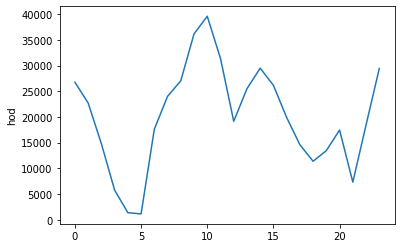

In [59]:
sns.lineplot(x = hours_stops.index, y= hours_stops)

## White drivers searched less than others (for drugs)

In [61]:
data.search_conducted = data.search_conducted.astype(bool)

In [63]:
data.search_conducted.value_counts(normalize=True)

False    0.963041
True     0.036959
Name: search_conducted, dtype: float64

In [67]:
pd.crosstab(data.search_conducted, data.driver_race, normalize='columns')

driver_race,Asian,Black,Hispanic,Other,White
search_conducted,,,,,
False,0.978166,0.937151,0.93997,0.988839,0.971083
True,0.021834,0.062849,0.06003,0.011161,0.028917


## Exploring the data step by step

We will start with simple counts, proportions, averages etc. and move from there to more advanced concepts

In [ ]:
# We can explore unique values for a column (even if it's a string)
data.stop_outcome.unique() 

In [ ]:
# count the distinct values
data.stop_outcome.value_counts()

Here you see again an example of dot-notation. We just put a dot and the column name to access a column

```
data.stop_outcome
```
instead of
```
data['stop_outcome']
```

Again, both are fine and the more complex second one is 'safer' to use 


In [ ]:
# there are many ways to do the same thing
data.groupby('stop_outcome').size()

In [ ]:
# Value counts provides a nice proportions option
data.stop_outcome.value_counts(normalize=True)

In [ ]:
# Let's check distribution by race in %

data.driver_race.value_counts(normalize=True)

### Let's try out some hypotheses

One hypothesis could be that the stop_outcome is different for different races. Discrimination?

In [ ]:
# create 3 series for different races
# here we use a selection as a mask to subset for specific criteria

black = data[data.driver_race == 'Black']
white = data[data.driver_race == 'White']
hispanic = data[data.driver_race == 'Hispanic']

In [ ]:
black.stop_outcome.value_counts(normalize=True)

In [ ]:
white.stop_outcome.value_counts(normalize=True)

In [ ]:
hispanic.stop_outcome.value_counts(normalize=True)

 💪 💪 💪 💪 💪 💪 💪

Can we do that easier? Yes!
Pandas has an amazing ```crosstabs``` function.

Take 5 minutes to implement the above using ```crosstabs```


In [ ]:
pd.crosstab(data.driver_race,data.stop_outcome, normalize='index')

#### Let's try out to come up with some interesting hypotheses and find answers using the methods that we learned so far.

Now you are probably asking: Can't we speed this up somehow?

In [ ]:
#You probably will have to - Colab has that covered
#!pip install pandas_profiling


In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

### Filtering by multiple conditions

We can of cause chain filter conditions

In [ ]:
# note the ( ) around the conditions
hispanic_and_arrested = data[(data.driver_race == 'Hispanic')
                             & (data.is_arrested == True)]

In [ ]:
# in case you are bored by the shape command
len(hispanic_and_arrested)

In [ ]:
# We can also ask for hispanic OR arrested (not sure how much that tells us)

hispanic_or_arrested = data[(data.driver_race == 'Hispanic')
                            | (data.is_arrested == True)]

In [ ]:
hispanic_or_arrested.shape

##### Rules for filtering

- & AND
- | OR
- Each condition must be surrounded by () and many are possible
- == Equality
- != Inequality

##### Remember, that we are not making any statement about causation. This is purely a correlation exercise (so far!)

#### A bit on boolean series

True = 1 and False = 0
Which means that you can perform calculations on them:


In [ ]:
data.stop_outcome

In [ ]:
# Create a DataFrame of male and female drivers stopped for speeding
female_and_speeding = data[(data.driver_gender == 'F') & (data.violation == 'Speeding')]
male_and_speeding = data[(data.driver_gender == 'M') & (data.violation == 'Speeding')]

# Compute the stop outcomes for drivers (as proportions)
# TIPP: If you have multiple things that should be shown from one cell's output, it's better to print it out
print(female_and_speeding.stop_outcome.value_counts(normalize=True))
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

In [ ]:
# What's the probability for arrests? (for check 0.03454755048024903)



### Using groupby to compare groups

Rememebre when we compared stop outcome rates by race? Well: That was not very elegant. We can certainly do better using the groupby function

In [ ]:
# Here we first group by the race and then calculate the mean for the arrested column
data.groupby('driver_race').is_arrested.mean()

We can see that black and Hispanic drivers end up more than twice as often arrested than white drivers. But perhaps geography plays a role and perhaps there are some outlier "bad neighborhoods"

In [ ]:
# Group data by district and race and calculate the mean of a third factor
data.groupby(['district','driver_race']).is_arrested.mean()

In [ ]:
# Which violations lead for the different genders to what rates of arrest?

# TRY IT FOR YOURSELF --> That's what you should get:

#violation            driver_gender
#Equipment            F                0.061614
#                     M                0.060028
#Moving violation     F                0.054380
#                     M                0.058008
#Other                F                0.115273
#                     M                0.073684
#Registration/plates  F                0.078598
#                     M                0.088781
#Seat belt            F                0.021972
#                     M                0.028026
#Speeding             F                0.006323
#                     M                0.017032


data.groupby(['violation','driver_gender']).is_arrested.mean()


### "protective frisk"
Sometimes during stops if a search is conducted, the officer also checks the driver if they have a weapon. This is called a "protective frisk".
Let's try to figure out if men are frisked more than women.

In [ ]:
# Look at the different search types performed
data.search_type.value_counts()

#### Extracting a string
As you can see, search type is a multiple choice object/string column. *Incident to Arrest* and *Pribable Cause* are the most commont but combinations are possible. We can use the `str.contains` method to filter to filter out cases of interest. This will return a boolean series, which we can assign to a new varioable 'frisk' in our dataframe.

In [ ]:
# We ask pandas to find out if the string in the search_type column contatins
# the sequence "Protective Frisk"
# We assign the result to a new column that we call "frisk"

data['frisk'] = data.search_type.str.contains('Protective Frisk', na = False)

In [ ]:
data.frisk.head()

In [ ]:
# backup code in case you are not convinced that it worked
# this snippet shows the source and the boolean result side by side

# generate a data frame by concatenating source and target of the str.contains method. Note, that this concat
# of columns or rows is different from the str.cat that we learned before
frisks = pd.concat([data.search_type, data.search_type.str.contains('Protective Frisk', na = False)], axis=1)

# display the second column using the iloc selector (here useful since we have two columns with the same name)
frisks[frisks.iloc[:,1] == True]

In [ ]:
# How many frisks have been performed? (1598)
data.frisk.sum()

In [ ]:
# Do men get frisked more often? (M: 0.004104; F: 0.001251)
data.groupby('driver_gender').frisk.mean()

## Using the datetime index to select data

What if you assume that things got better or worse over the years? Or perhaps the time of the day plays a role?  📈
Remember we assigned a datetime column to our index? 
In case you need a recap:

```python
combined = data.stop_date.str.cat(data.stop_time, sep=' ')
data['date_and_time'] = pd.to_datetime(combined)
data.set_index('date_and_time', inplace=True)
```

That allows us now to access the time dimension at various levles in our index.

```python
data.index.day
data.index.month
data.index.day_name()
data.index.month_name()
```

We can now use that for groupby etc.

In [ ]:
# Are things getting better or worse over the years?
data.groupby(data.index.year).frisk.mean()

In [ ]:
data.groupby(data.index.year).is_arrested.mean()

In [ ]:
# What's the week with most arrests? Can you guess? Use .sort_values(ascending=False) to get immediate access to the top value.

data.groupby(data.index.week).is_arrested.mean().sort_values(ascending=False)

### Let's start plotting some of these stats

Pandas provides a very easy plotting interface for standard visualisations. For more complex plots, we will be using Seaborn later on.

But for now, you can access plotting simply by adding ```.plot()```` after applying some calculation to a dataframe or series.

In [ ]:
# don't forget to tell Jupyter to activate inline plots

%matplotlib inline


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

plt.rcParams["figure.figsize"] =(12,10)

In [ ]:
out = data.groupby(data.index.month).is_arrested.mean()*100

In [ ]:
# e.g. Show the different months that can be accessed
figure = out.plot(kind='barh')

plt.ylabel('month')
plt.xlabel('arrest rate')
plt.title('Monthly mean arrest rate in traffic stops')

# saving the plot is as easy as

plt.savefig('is_arrested_bymonth.pdf', format='pdf')

In [ ]:
# Make a graph showing yearly frisk rates

(data.groupby(data.index.year).frisk.mean()*100).plot(kind='line')

#### Using resampling to aggregate data rather than group it.

But isn't that the same what we just did before? Well, actually it's not the same. Instead of grouping by month (12 months), we will re-aggregate the data for the individual months: Jan 05 - Dec 15.

``` python
data.is_arrested.resample('M').mean()````

More on that here: [Resampling time series data with pandas](http://benalexkeen.com/resampling-time-series-data-with-pandas/)


In [ ]:
data.is_arrested.resample('M').mean().plot()

In [ ]:
data['search_conducted'] = data.search_conducted.astype('bool')

In [ ]:
aaa = data.search_conducted.resample('M').mean()

In [ ]:
# Make a monthly search conducted graph and save it as a PNG file :-)

data.search_conducted.resample('M').mean().plot()

plt.savefig('search_conducted.png', format='png')

Let's try something mode complicated: Let's compate  montly searches vs. drug-related stops after 2007

In [ ]:
# Save the monthly rate of drug-related stops
monthly_drug_rate = data.drugs_related_stop.resample('M').mean()

# Calculate and save the monthly search rate
monthly_search_rate = data.search_conducted.resample('M').mean()

# Concatenate the two
monthly = pd.concat([monthly_drug_rate,monthly_search_rate], axis='columns')

# cut of a few years in the beginning
monthly = monthly[monthly.index>=pd.to_datetime('2007-1-1')]

# Create subplots from 'annual'
monthly.plot(subplots=True)

# Display the subplots
plt.show()

#### Crosstabs

Crosstabs allow us to explore categorical data considering varous dimensions. Actually, it is the same as grouping by several columns, counting it up with .size() and then bringing the data in wide format (using .unstack())

You'll agree that crosstab is easier...however for some reason computationally more expensive 🤔
Sidenote: 

```%time``` infront of a line of code to measure execution time
```%%time``` before executing a code-chunk (for instance a loop or a function which we will cover eventully)

```%timeit``` will perform the same 10, 100, 1000 times and give you an average (you never know what your CPU and memory are up to at any moment)


In [ ]:
%timeit data.groupby([data.driver_race, data.driver_gender]).size()

In [ ]:
%time data.groupby([data.driver_race, data.driver_gender]).size().unstack()

In [ ]:
%%timeit
pd.crosstab(data.driver_race, data.driver_gender)

### Transforming categorical in to nummerical data

You may have noted the ```stop_duration``` column in our dataset and that it is an ```object``` variable. That means, we can use it as a dimension but not to perform any calculations. What we can do, is map the categories to a reasonable nummerical value using a mapping dictionary the  ```map``` command.

In [ ]:
# First, we should inspect the unique values of the column:
# you could use the unique() command but value_counts() is helpful here,
# as it can help us identify outlier cases

data.stop_duration.value_counts() 

As you can see, there are 6 rows that clearly don't fit and should probably be eliminated
We need to filter the dataframe for observations where the ```stop_duration``` hase one of the three values: '0-15 Min', '16-30 Min', '30+ Min'

We can use pandas' ```isin``` function here. By the way: If you are doing the opposite "not in" query, you can set a ```~``` after the ```[``` and it will inverse your selection.

In [ ]:
# I'm lazy: First we can ask pandas to give us a list of possible values that we can copy-paste below into our query
data.stop_duration.unique()

In [ ]:
# This step should be pretty familiar

data = data[data.stop_duration.isin(['0-15 Min', '16-30 Min', '30+ Min'])]

In [ ]:
# Let's see if the inverse also works:

data[~data.stop_duration.isin(['0-15 Min', '16-30 Min', '30+ Min'])].stop_duration.unique()

As you can see, challenges pop up all the time and that's why working with data is not a linear or clean process but messy, at times confusing and will require you to look up things on the interenet all the time.

Now we can create a mapping dictionary. But wait, we never covered what a dictionary is.

A dictionary is one of Python's fundamental data structures. You already met ints, floats, strings. There are also lists, sets, tuples and dictionaries (these are the most common types).

For now: A dictionary maps ```keys```to ```values```

![dict](https://developers.google.com/edu/python/images/dict.png)

You input a key and you get a value, disregarding the order. A dictionary has a slightly weird syntax with curly brackets and : but you'll get used to it.

In [ ]:
# Let's create our mapping

mapping = {'0-15 Min':7.5, '16-30 Min':23, '30+ Min':45}

# And use it right away to create a new column
data['stop_duration_num'] = data.stop_duration.map(mapping)

# a quick check of what we achieved
print(data.stop_duration_num[:5])

#### A quick intro to loops

The great advantage with computers is that they are happy to do boring repetitive stuff for us without getting tired. If we think a bit about the ```map``` function, what it did was to take every observation of ```stop_duration``` in our dataframe and translate it to the corresponding value in our mapping dictionary.

Let's try some made up pseudocode:

```

stop_duration_num = [] #creating an empty list

for every observation in data.stop_duration do:
    look up corresponding value in the mapping dictionary
    append the value to the stop_duration_num list
    
finally:

data['stop_duration_num'] = stop_duration_num list
    
```


Actually we can write exactly that as a loop

```python
stop_duration_num_list = []

for x in data.stop_duration:
    value = mapping[x]
    stop_duration_num_list.append(value)

# we skip the creation of the new column since we already have it

```

Aside form for-loop as that one there are also while loops that will do something while some condition is met

You can find more on datatypes and loops (iteration) in [this cheat sheet](https://www.theredhillacademy.org.uk/pluginfile.php?file=/15673/block_html/content/Python%20Cheat%20Sheet.pdf)
and many other places. Iteration is a core concept in computer science  and will be important in later modules. If you code for the first time in your life, it's a slightly strange concept to get your head around but after some time it becomes second nature. For now, it's good to get some initial feeling for the concept.

#### Let's return to our ```stop_duration``` problem

Since, we created a nummerical value, we can for instance check if average stop duration is different for different violations:

In [ ]:
# Let's do everything in one line

data.groupby([data.violation_raw]).stop_duration_num.mean().sort_values().plot(kind='barh')

#### Cutting intervals

```data.driver_age``` contains the (duh) the age of the driver. ```data.driver_age.dtype``` will tell us that it's a continuous nummerical value and thus good for more advanced analysis but perhaps a bit to detailed for exploration (?)

More instrumental in that context would be to slice that variable up into ordered categries corresponding to age-populations of interest, say "teen", "20s", "30s" etc.

In [ ]:
# Let's check the variable
data.driver_age.describe()

In [ ]:
# We can slice tha data into some numebr of bins (sometimes useful)
data['age_cat'] = pd.cut(data.driver_age,bins=6)

In [ ]:
# We can also provide labels
labels=["teen", "20s", "30s", "40s", "50+"]
data['age_cat'] = pd.cut(data.driver_age, bins=5, labels=labels)

In [ ]:
data['age_cat'][:5]

In [ ]:
# We can also provide custom intervals
# Unfortunately (not sure why) there is no way to do both together
bins = pd.IntervalIndex.from_tuples([(10, 20), (20, 30), (30, 40), (40,50), (50,100)])
data['age_cat'] = pd.cut(data.driver_age, bins = bins)

In [ ]:
data.dropna(subset=['age_cat'], inplace=True)

In [ ]:
table = pd.crosstab(data.driver_race, data.age_cat)
table

In [ ]:
# We can plot that but perhaps let's modify a bit first
table = pd.crosstab(data.driver_race, data.age_cat, normalize='index')

# keep only minority races
table = table.iloc[:3,]

# let's plot some stacked bars
table.plot(kind='bar', stacked=True)

### Enters weather data

To be precise: Local climatological data from https://www.ncdc.noaa.gov/

I put the data on GitHub: https://sds-aau.github.io/SDS-master/M1/data/RI-weather.csv

In [ ]:
weather = pd.read_csv('https://sds-aau.github.io/SDS-master/M1/data/RI-weather.csv')

In [ ]:
weather.head()

In [ ]:
#AWND and WSF2 are wind-speed variables

weather[['AWND', 'WSF2']].head()

In [ ]:
weather[['AWND', 'WSF2']].plot(kind='box') 

In [ ]:
weather['WDIFF'] = weather.WSF2 - weather.AWND
weather.WDIFF.plot(kind='hist')

In [ ]:
weather.WDIFF.plot(kind='hist', bins=50)
plt.savefig('fig1.pdf') # would like to save it for later? Pass this line in the same cell and you'll get the pdf

#### Introducing Seaborn

Seaborn is a great project with the mission to make statistical plots easier in Python. You can find more on their [Homepage](https://seaborn.pydata.org/index.html).

Datacamp created [this cheat sheet](https://www.datacamp.com/community/blog/seaborn-cheat-sheet-python) that summarizes most important functions.

In [ ]:
# We already imported seaborn (without talking a lot about it). Let's do it again, which is not a problem

import seaborn as sns # sns is the conventional abbriviation
sns.set(style="darkgrid") # Darkgrid is a nice ggplot (R) - like style that looks

In [ ]:
# Let's do the same what we just did but now using Searborn
# We replace the standard histogram by a Distribution plot (same same)
sns.distplot(weather.WDIFF)

You can read much more about all the different things that you can do with distplots [here](https://seaborn.pydata.org/generated/seaborn.distplot.html)

In [ ]:
fig = sns.distplot(weather.WDIFF, hist=False,
             rug=True,
             kde_kws={'shade':True})

fig.figure.savefig('fig.pdf') # In case you would like to keep it :-)

In [ ]:
# Further examining the weather data
weather.shape

In [ ]:
weather.columns

In [ ]:
#Let's select just a sequence of columns 'from-to'
temp = weather.loc[:, 'TAVG':'TMAX']

In [ ]:
temp.head()

In [ ]:
# Can we say something about average temperature and average wind?

sns.jointplot(weather.TAVG, weather.AWND, kind="hex", color="#4CB391")

#### Data types advanced

We already used the map function to transform strings to nummerical values.
Now, let's try to create categories. This is not always necessary but nice to know.

In [ ]:
mapping = {'0-15 Min':'short', '16-30 Min':'medium', '30+ Min':'long'}

In [ ]:
data['stop_length'] = data.stop_duration.map(mapping)

In [ ]:
data.stop_length.memory_usage(deep=True)

In [ ]:
# We need to initiate this new data format first importing it
from pandas.api.types import CategoricalDtype

# Define our categories
cats = ['short', 'medium', 'long']

# And define the specific cateogory type (this is useful for survey data that is ordered)
cat_type = CategoricalDtype(categories=cats, ordered=True)

# Finally let's asign it
data['stop_length'] = data.stop_length.astype(cat_type)

In [ ]:
data.stop_length.memory_usage(deep=True)

# The first thing we notice --> this type is much more memory friendly. This is good when moving towards big data

In [ ]:
# Also now we see that pandas knows that short is short < medium < long
data.stop_length.head()

In [ ]:
# Any relation between stop duration and likelihood to get arrested?

# YOUR CODE HERE

#### Back to our weather data

Do you think that arrest rates or certain violations are related to weather?
For that we need to connect our weather data with the stops data

We will merge the two dataframes on the date index, as weather data is available daily

In [ ]:
# First let's prepare the weather data first, by parsing the date-column
weather.DATE = pd.to_datetime(weather.DATE)

In [ ]:
# We need to do the same with our stops data and its stop_date column
data.stop_date = pd.to_datetime(data.stop_date)

In [ ]:
# now let's merge

data_weather = pd.merge(data, weather, left_on='stop_date', right_on='DATE', how='left')

Pandas merge command is fairly simple:

We start with the left dataframe "data" in our case, then the right "weather", then pass the left and the right key and finally the merger type: Here "left", meaning that we would like to keep the left as it is and multiply the right on top of it (if that makes sense)

![merge](http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png)

And if you still think merging is mysterious then you should check out this [youtube tutorial](https://youtu.be/h4hOPGo4UVU)

In [ ]:
# data_weather.set_index('date_and_time', inplace=True)
data_weather.index = data.index

It is a not totally crazy assumption that police stops are shorter if it's cold...maybe. Let's check that.

The syntax is a bit more advanced but I'll do my best to explain. We will control for the violation type, assuming that different violations lead to different durations by their nature.

In [ ]:
# We need to aggregate the data first on 2 levels: Time and Violation.
# For this we need to use pandas Grouper module (I also had to look it up)

violation_duration = data_weather.groupby([pd.Grouper(key='stop_date', freq='D'), 'violation']).stop_duration_num.mean()

In [ ]:
# Such groupby commands deliver a multi-indexed series. That's not useful for further work.
# But we can transform them into Dataframes with various index levels turning into columns.
violation_duration = pd.DataFrame(violation_duration).reset_index()

In [ ]:
# Same for the temperature data
avg_temp = data_weather.resample('D').TAVG.mean()

In [ ]:
avg_temp = pd.DataFrame(avg_temp).reset_index()

In [ ]:
# Now let's merge both DFs
search_temp = pd.merge(violation_duration, avg_temp, left_on='stop_date', right_on='date_and_time', how='left')

In [ ]:
# We plot our resulting DF using Seaborn using the col argument to create subplots for the different violation types
sns.lmplot('stop_duration_num', 'TAVG', data=search_temp[search_temp.stop_duration_num < 20], col = 'violation')

#### Heatmaps are another useful visualization

In [ ]:
# You should by now be able to read this without problems
sns.heatmap(pd.crosstab(data.driver_race, data.driver_gender, values=data.is_arrested, aggfunc='mean'))

In [ ]:
# We can make this heatmap more informative using some of Seaborn's functionality

sns.heatmap(pd.crosstab(data.driver_race, data.driver_gender, values=data.is_arrested, aggfunc='mean'),
            annot=True, cmap="YlGnBu", cbar=False, linewidths=.5)

### Search discrimination?

Finally we would like to find out if searches are conducted more often for some races.

In [ ]:
# First we need to create a boolean variable for searches
data['search_conducted'] = data.search_conducted.astype('bool')

In [ ]:
# Calculate the search rate by race
search_rates = pd.crosstab(data.district, data.driver_race, data.search_conducted, aggfunc='mean')

### Exactly the same
# search_rates = data.groupby(['district','driver_race']).search_conducted.mean().unstack()

In [ ]:
searches_per_district = data.groupby('district').size()

In [ ]:
search_rates_per_district = pd.concat([search_rates, searches_per_district], axis = 1)

In [ ]:
search_rates_per_district['stops'] = search_rates_per_district[0]

In [ ]:
search_rates_per_district

Now some more advanced plotting:

Can you understand what's going on here?

In [ ]:
plt.figure(figsize=(10,10))
plt.axis([0.0,0.085, 0.0,0.085])
plot = plt.scatter(search_rates_per_district.White, search_rates_per_district.Hispanic,  s = search_rates_per_district.stops/100)
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.xlabel('White')
plt.ylabel('Hispanic')

In [ ]:
plt.figure(figsize=(10,10))
plt.axis([0.0,0.085,0.0,0.085])
plot = plt.scatter(search_rates_per_district.White, search_rates_per_district.Black,  s = search_rates_per_district.stops/100)
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.xlabel('White')
plt.ylabel('Black')

In [ ]:
found_rates = data.groupby(['district','driver_race']).contraband_found.sum() / data.groupby(['district','driver_race']).search_conducted.sum() 
found_rates_per_district = pd.concat([found_rates.unstack(),data.groupby('district').search_conducted.sum()], axis = 1)

In [ ]:
found_rates_per_district

In [ ]:
plt.figure(figsize=(10,10))
plt.axis([0,0.5,0,0.5])
plot = plt.scatter("White", "Hispanic", data = found_rates_per_district, s = found_rates_per_district.search_conducted/50)
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.xlabel('White')
plt.ylabel('Hispanic')

In [ ]:
plt.figure(figsize=(10,10))
plt.axis([0,0.5,0,0.5])
plot = plt.scatter("White", "Black", data = found_rates_per_district, s = found_rates_per_district.search_conducted/50)
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.xlabel('White')
plt.ylabel('Black')